In [1]:
import pandas as pd

# Загрузка підготовлених даних
data = pd.read_csv('GlobalYouTubeStatistics.csv', delimiter=',', encoding='latin1')

# ВИдалення нульових значень
data = data.dropna()

data

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,...,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [378]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Перетворення категоріальних даних на float
label_encoder = LabelEncoder()

data['uploads'] = label_encoder.fit_transform(data['uploads'])
data['uploads'] = data['uploads'].astype(float)

data['Country'] = label_encoder.fit_transform(data['Country'])
data['Country'] = data['Country'].astype(float)

data['channel_type'] = label_encoder.fit_transform(data['channel_type'])
data['channel_type'] = data['channel_type'].astype(float)

In [379]:
X = data[['uploads', 'Country']]
y = data['channel_type']

# Розбиття даних на навчальну та тестову групи, з відношенням 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [380]:
# Нормалізація набору даних для тренування
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [381]:
# Побудова моделі
from sklearn.svm import SVC
model = SVC(kernel='linear', degree=3, gamma='auto', coef0=1)
model.fit(X_train_scaled, y_train)

SVC(coef0=1, gamma='auto', kernel='linear')

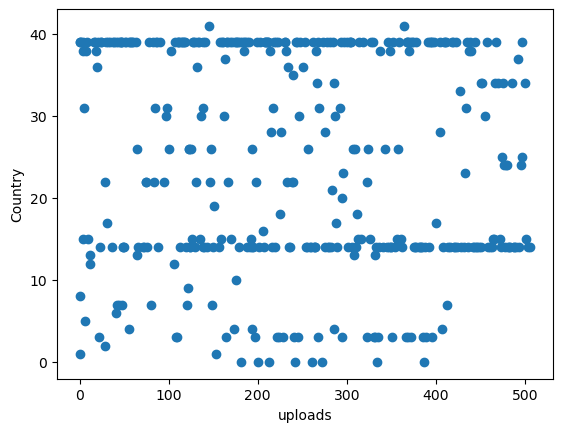

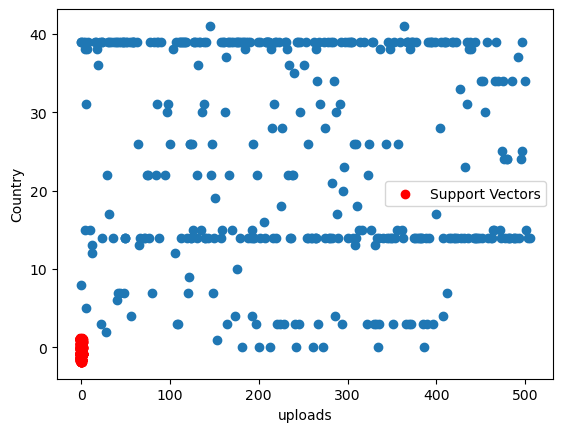

In [382]:
# Візуалізація моделі

# Вивід графіку без підтримуваних векторів
plt.scatter(X_train['uploads'], X_train['Country'])
plt.xlabel('uploads')
plt.ylabel('Country')
plt.show()

# Обрахунок підтримуваних векторів
support_vectors = model.support_vectors_

# Вивід графіку з підтримуваними векторами
plt.scatter(X_train['uploads'], X_train['Country'])
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='red', marker='o', label='Support Vectors')
plt.xlabel('uploads')
plt.ylabel('Country')
plt.legend()
plt.show()

In [383]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Створення прогнозу
y_pred = model.predict(X_test)

# Оцінка точності
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Матриця плутанини
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.33532934131736525
Confusion Matrix:
[[ 0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0]]


D:\Software\Anaconda\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [384]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

values = [0.1, 0, 4, 3.2, 5.7]
kernel = 'linear'
best_accuracy = 0.0

# Тренування нової моделі для кожного значення з масиву values
for value in values:
    model = SVC(kernel=kernel, C=C, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for value={value}: {accuracy}")

    # Перевірка чи досягнуто нової найкращої точності
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_value = value

# Оцінка параметрів оптимальної моделі
print("Best value:", best_value)
print("Best Accuracy:", best_accuracy)

Accuracy for value=0.1: 0.3592814371257485
Accuracy for value=0: 0.3592814371257485
Accuracy for value=4: 0.3592814371257485
Accuracy for value=3.2: 0.3592814371257485
Accuracy for value=5.7: 0.3592814371257485
Best value: 0.1
Best Accuracy: 0.3592814371257485
